# Rotation in 3D

* normalize isnlocal 
* call other rotatio matrix and homogoenous then do roteate ()


## The intuition

Let's think about a ship on the ocean.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/df/Rotations.png" alt="drawing" width="200"/>

https://nautiluslive.org/video/2020/12/09/beyond-wow-six-types-ship-motion (start at minute 1)

**Review**: What type of transformation can be used to define the other three types of ship motion?

**Question**: map the axis (x, y or z) to the type of ship rotation motion:
* pitch
* roll
* yaw


## The rotation matrices

* around the x-axis, by $\theta$ radians: $$\begin{pmatrix} 1 & 0 & 0  \\ 0 & cos(\theta) & -sin(\theta) \\ 0 & sin(\theta) & cos(\theta)  \end{pmatrix}$$
* around the y-axis, by $\theta$ radians: $$\begin{pmatrix} cos(\theta) & 0 & sin(\theta)  \\ 0 & 1 & 0 \\ -sin(\theta) & 0 & cos(\theta) \end{pmatrix}$$
* around the z-axis, by $\theta$ radians: $$\begin{pmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

## Let's play with it
**see where 1 is**

https://www.cs.usfca.edu/~galles/visualization/RotateScale3D.html

## Now on our car data

First we load and look at our data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8", usecols=[1,2, 3]))  

# let's just keep 100 rows
data = data[100:200, :]

# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["price", "year", "odometer"])

In [3]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0            1              2
0      0.000000  2002.000000    1000.000000
1  29500.000000  2019.000000  295000.000000
2   8464.720000  2012.910000  106729.650000
3   5791.172279     3.627933   44931.355454
shape
((100, 3), dtype('int64'))


This is a new type of plot; 3d scatterplot!

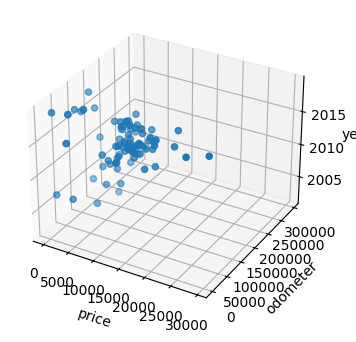

In [7]:
# %matplotlib notebook
import matplotlib.pyplot as plt
 
# Create Figure

def plot3d(data):
    plt.figure(figsize = (5,4))
    seaborn_plot = plt.axes(projection='3d')
    seaborn_plot.scatter3D(data[:, 0], data[:, 2], data[:, 1])
    seaborn_plot.set_xlabel('price')
    seaborn_plot.set_ylabel('odometer')
    seaborn_plot.set_zlabel('year')
    plt.show()

plot3d(data)

Now you implement the transformation matrices.

In [22]:
rotateTransform = np.array([np.cos(np.radians(270)), -np.sin(np.radians(270)), np.sin(np.radians(270)), np.cos(np.radians(270))]).reshape(2, 2)
print(rotateTransform)




# yaw
def rotateTransformX(x):
    rotateTransform = np.eye(3,3)
    rotateTransform[1,1]=np.cos(np.radians(x))
    rotateTransform[1,2]=-np.sin(np.radians(x))
    rotateTransform[2,1]=np.sin(np.radians(x))
    rotateTransform[2,2]=np.cos(np.radians(x))
    return rotateTransform

# pitch
def rotateTransformY(y):
    rotateTransform = np.eye(3,3)
    rotateTransform[0,0]=np.cos(np.radians(y))
    rotateTransform[0,2]=-np.sin(np.radians(y))
    rotateTransform[2,0]=-np.sin(np.radians(y))
    rotateTransform[2,2]=np.cos(np.radians(y))
    return rotateTransform

# roll
def rotateTransformZ(z):
    rotateTransform = np.eye(3,3)
    rotateTransform[0,0]=np.cos(np.radians(z))
    rotateTransform[0,1]=-np.sin(np.radians(z))
    rotateTransform[1,0]=np.sin(np.radians(z))
    rotateTransform[1,1]=np.cos(np.radians(z))
    return rotateTransform

[[-1.8369702e-16  1.0000000e+00]
 [-1.0000000e+00 -1.8369702e-16]]


**And then we rotate our data by 90' along each axis just to see.**

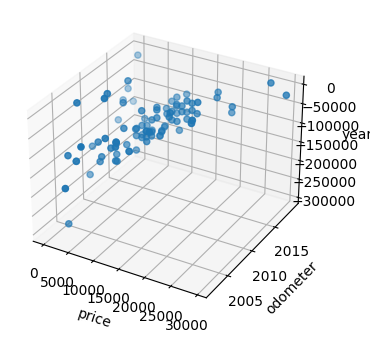

In [16]:
transformMatrix = rotateTransformX(90)
newData = (transformMatrix@data.T).T
plot3d(newData)

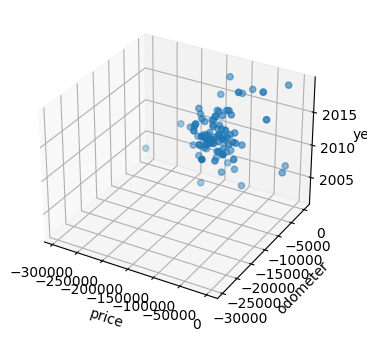

In [20]:
transformMatrix = rotateTransformY(90)
newData = (transformMatrix@data.T).T
plot3d(newData)

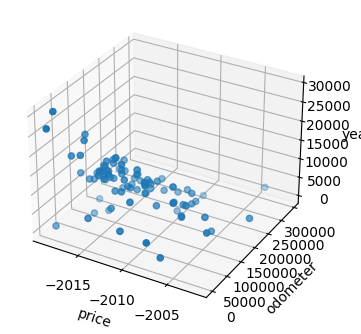

In [23]:
transformMatrix = rotateTransformZ(90)
newData = (transformMatrix@data.T).T
plot3d(newData)

* unifmrative-rotate by 190 x
* informative- rotate 180 x

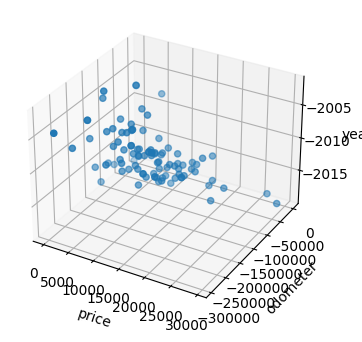

In [25]:
transformMatrix = rotateTransformX(180)
newData = (transformMatrix@data.T).T
plot3d(newData)

## Challenge

So far we have been rotating around the *origin*. How do we do rotate *around a point*?

* translate, rotate, and then untranslate it back
* one step: rotation matrix with translation and then rotate back